<a href="https://colab.research.google.com/github/ravindrabharathi/Project1/blob/master/EIP4/session3/EIP4_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a CNN model built with only Depthwise Separable Convolutions to classify CIFAR-10 image samples

Import necessary modules 

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


create training and test data from cifar10 dataset 

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


plot an image from each class in cifar-10

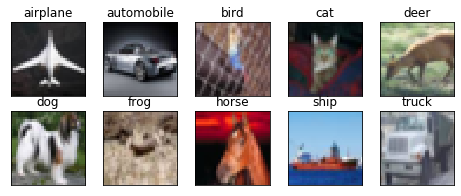

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

function to plot model training history 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

function to calculate accuracy of model

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

standardize image pixel values to be between 0 and 1

convert train and test labels to one hot encoded vectors

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Base model - uses Conv2D 

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

Base model summary

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Train Base model for 50 epochs 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 30s 77ms/step - loss: 1.8141 - acc: 0.3098 - val_loss: 1.3899 - val_acc: 0.4968
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3051 - acc: 0.5294 - val_loss: 1.1169 - val_acc: 0.5939
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.0870 - acc: 0.6170 - val_loss: 0.9273 - val_acc: 0.6753
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9354 - acc: 0.6736 - val_loss: 0.8385 - val_acc: 0.7096
Epoch 5/50
390/390 [==============================] - 21s 54ms/step - loss: 0.8361 - acc: 0.7121 - val_loss: 0.7555 - val_acc: 0.7403
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7756 - acc: 0.7355 - val_loss: 0.7212 - val_acc: 0.7539
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7171 - acc: 0.7549 - val_loss: 0.6789 - val_acc: 0.7679
Epoch 8/50
390/390 [==============================] - 

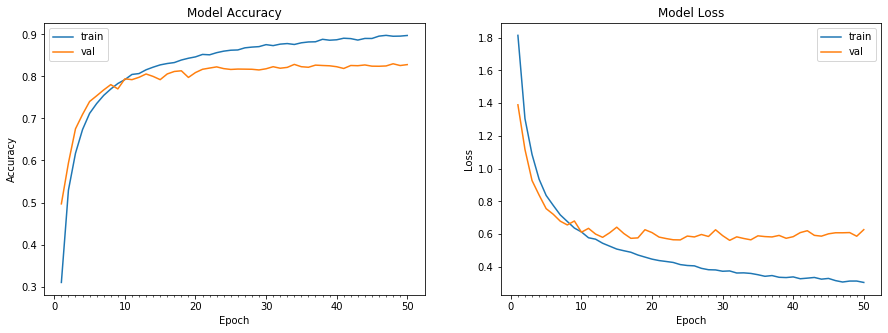

Accuracy on test data is: 82.81


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Base model final accuracy is 82.81 and max accuracy is 83.01 

Our goal is to build a model that beats this baseline accuracy using only Depthwise separable convolutions and pooling . Since our model also has the constrain of having less that 100000 parameters , we will also use 1x1 convolutions as bottlenecks to reduce the number of channels 



A good initialization of weights helps in the training of deep learning models. We will use TruncatedNormal initializer with a mean of 0 and std. deviation of 0.05

In [0]:
import tensorflow as tf
wt_init = tf.keras.initializers.TruncatedNormal(mean=0.0,stddev=0.05,
                                                          seed=42)

Model with Depthwise separable convolutions . 

Output channel size and Receptive field values have been indicated below each layer

In [40]:
# Define the model
model = Sequential()
#model.add(Dropout(0.1 , input_shape=(32,32,3)))
model.add(SeparableConv2D(64, 3, 3, border_mode='same',use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 32 x 32 , RF =3

model.add(SeparableConv2D(96, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

#output channel size = 30 x 30 , RF =5 


model.add(SeparableConv2D(96, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 28 x 28, RF =7

#bottleneck 
model.add(Convolution2D(64,1,1,use_bias=False,kernel_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output channel size = 28 x 28 , RF =7

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))

# output channel size = 14 x 14 , RF = 8

model.add(SeparableConv2D(64, 3, 3, use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.03))

# output channel size = 14 x 14 , RF =12

model.add(SeparableConv2D(96, 3, 3,use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.03))

# output channel size = 14 x 14 , RF = 16

model.add(SeparableConv2D(192, 3, 3,use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 14 x 14 , RF = 20

#bottleneck 
model.add(Convolution2D(64,1,1,use_bias=False,kernel_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output channel size = 14 x 14 , RF = 20

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))

# output channel size = 7 x 7 , RF = 22


model.add(SeparableConv2D(96, 3, 3,use_bias=False, border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 7 x 7 , RF =30 

model.add(SeparableConv2D(192, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output channel size = 5 x 5 , RF =38 

model.add(Convolution2D(10,1,1,use_bias=False,kernel_initializer=wt_init))

# output channel size = 5 x 5 , RF = 38

model.add(AveragePooling2D(5,5))

# output channel size = 1 x 1 , RF = 54 

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25

print model summary to check that the number of parameters is below 100000

In [41]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_67 (Separab (None, 32, 32, 64)        219       
_________________________________________________________________
batch_normalization_77 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_92 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_68 (Separab (None, 30, 30, 96)        6720      
_________________________________________________________________
batch_normalization_78 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
activation_93 (Activation)   (None, 30, 30, 96)      

Use Adam optimizer with a initial learning rate of 0.02 and then reduce the lr progressively during training with a scheduler

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.02 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['accuracy'])  

Perform Image Normalization for train and test data  

In [0]:
train_mean = np.mean(train_features, axis=(0,1,2))
train_std = np.std(train_features, axis=(0,1,2))

normalize = lambda x: ((x - train_mean) / train_std).astype('float32') 

train_features = normalize(train_features)
test_features = normalize(test_features)

Train the model for 50 epochs . 

We are not using any additional image augmentation since the baseline model also did not use image augmentation 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=391.0, validation_data=(array([[[..., validation_steps=79.0, callbacks=[<keras.ca..., verbose=1, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
391/391 [==============================] - 76s 193ms/step - loss: 1.6532 - acc: 0.3822 - val_loss: 4.8997 - val_acc: 0.2260
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0151630023.
391/391 [==============================] - 62s 159ms/step - loss: 1.1477 - acc: 0.5864 - val_loss: 1.9773 - val_acc: 0.4981
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0122100122.
391/391 [==============================] - 63s 160ms/step - loss: 0.9435 - acc: 0.6632 - val_loss: 1.1069 - val_acc: 0.6409
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0102197241.
391/391 [==============================] - 63s 161ms/step - loss: 0.8012 - acc: 0.7177 - val_loss: 0.8471 - val_acc: 0.7145
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0087873462.
391/391 [==============================] - 62s 159ms/step - loss: 0.7095 - acc: 0.

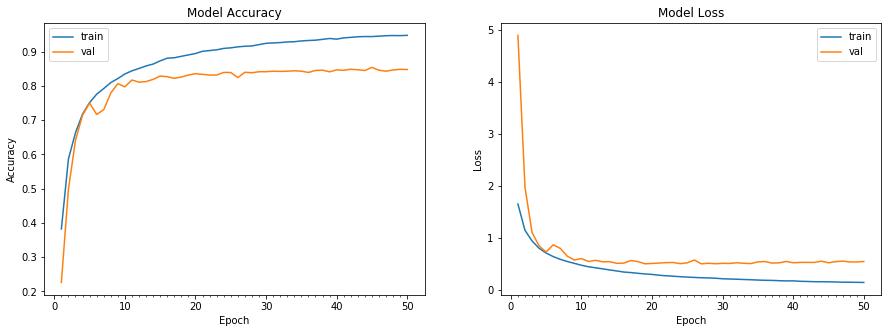

Accuracy on test data is: 84.77


In [43]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

batch_size=128

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = np.ceil(train_features.shape[0]/batch_size), nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), 
                                 validation_steps=np.ceil(test_features.shape[0]/batch_size),
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)],
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#### Accuracy of model on test data is 84.77 after 50 epochs and max validation accuracy of 85.39 was reached at the 46th epoch. This is more than the baseline model's max validation accuracy


### model without the 1x1 bottleneck 
Let us remove the bottleneck layers before each max pooling operation to see how the model fares . 

The output channel size and effective RF will remain the same in the remaining layers since we are only removing 1x1 bottleneck 

In [0]:
# Define the model
model = Sequential()

model.add(SeparableConv2D(64, 3, 3, border_mode='same',use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 32 x 32 , RF =3

model.add(SeparableConv2D(96, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

#output channel size = 30 x 30 , RF =5 


model.add(SeparableConv2D(96, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 28 x 28, RF =7


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))

# output channel size = 14 x 14 , RF = 8

model.add(SeparableConv2D(64, 3, 3, use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.03))

# output channel size = 14 x 14 , RF =12

model.add(SeparableConv2D(96, 3, 3,use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.03))

# output channel size = 14 x 14 , RF = 16

model.add(SeparableConv2D(192, 3, 3,use_bias=False,border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 14 x 14 , RF = 20


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))

# output channel size = 7 x 7 , RF = 22


model.add(SeparableConv2D(96, 3, 3,use_bias=False, border_mode='same',depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

# output channel size = 7 x 7 , RF =30 

model.add(SeparableConv2D(192, 3, 3,use_bias=False,depthwise_initializer=wt_init,pointwise_initializer=wt_init))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output channel size = 5 x 5 , RF =38 

model.add(Convolution2D(10,1,1,use_bias=False,kernel_initializer=wt_init))

# output channel size = 5 x 5 , RF = 38

model.add(AveragePooling2D(5,5))

# output channel size = 1 x 1 , RF = 54 

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['accuracy'])  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo...)`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), use_bias=False, depthwise_init

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), use_bias=False, depthwise_initializer=<tensorflo..., pointwise_initializer=<tensorflo...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), use_bias=False, kernel_initializer=<tensorflo...)`


print model summary to check that the number of parameters is below 100000

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 64)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 96)        6720      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 96)       

Train the model for 50 epochs . 

We are not using any additional image augmentation since the baseline model also did not use image augmentation 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=391.0, validation_data=(array([[[..., validation_steps=79.0, callbacks=[<keras.ca..., verbose=1, epochs=50)`
  from ipykernel import kernelapp as app




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
391/391 [==============================] - 62s 160ms/step - loss: 1.6947 - acc: 0.3668 - val_loss: 4.0713 - val_acc: 0.3050
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0151630023.
391/391 [==============================] - 56s 144ms/step - loss: 1.2404 - acc: 0.5520 - val_loss: 1.5805 - val_acc: 0.5233
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0122100122.
391/391 [==============================] - 56s 143ms/step - loss: 1.0032 - acc: 0.6431 - val_loss: 1.2527 - val_acc: 0.5775
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0102197241.
391/391 [==============================] - 56s 143ms/step - loss: 0.8644 - acc: 0.6939 - val_loss: 0.9582 - val_acc: 0.6627
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0087873462.
391/391 [==============================] - 56s 143ms/step - loss: 0.7691 - acc: 

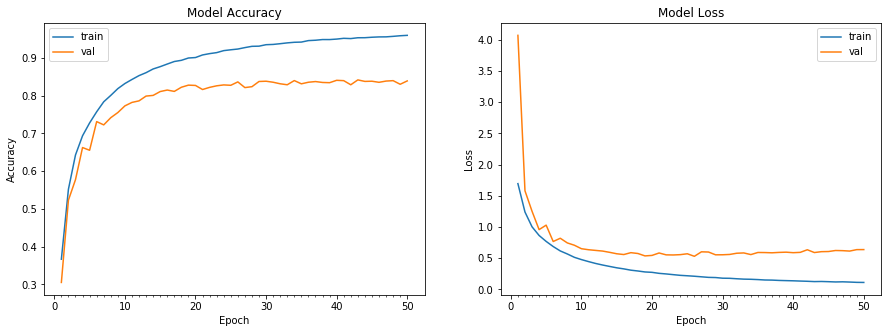

Accuracy on test data is: 83.94


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

batch_size=128

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = np.ceil(train_features.shape[0]/batch_size), nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), 
                                 validation_steps=np.ceil(test_features.shape[0]/batch_size),
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)],
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### The model without 1x1 bottleneck layers reached a max val accuracy of 84.21 in the 43rd epoch and val accuracy at the end of 50 epochs is 83.94 . These are also higher than the baseline model accuracy . 

We can also notice a reduction in time taken per epoch (about 9-10%) and also in overall time for 50 epochs. This is understandable given that we removed 2 1x1 bottlenecks layers. 

We can also see that the gap between train and test accuracy for the model without bottlnecks is slightly larger than the model with bottlenecks. Perhaps the 1x1 bottlenecks also help in adding some level of regularization in addition to reducing the number of feature maps/parameters.